In [1]:
from csd import CSD
from csd.typings import CSDConfiguration, Backends, RunConfiguration, MeasuringTypes
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, minimize_scalar

In [2]:
valid_backends = [
    Backends.FOCK,
    Backends.GAUSSIAN,
    Backends.TENSORFLOW,
]

alphas = list(np.arange(0.0, 2.05, 0.05))
# alphas = [0.7]

In [4]:
csd_result = CSD().execute(configuration=run_configuration)

[CSD] 0.0.1|DEBUG|2021-10-12 11:01:48]: Executing One Layer circuit with Backend: fock,  with measuring_type: probabilities
[CSD] 0.0.1|INFO|2021-10-12 11:01:48]: current_p_err: 0.0
[CSD] 0.0.1|INFO|2021-10-12 11:01:48]: current_p_err: 2.220446049250313e-16
[CSD] 0.0.1|INFO|2021-10-12 11:01:48]: current_p_err: 2.220446049250313e-16
[CSD] 0.0.1|INFO|2021-10-12 11:01:48]: current_p_err: 0.16199003325016642
[CSD] 0.0.1|INFO|2021-10-12 11:01:48]: current_p_err: 0.16199003478446714
[CSD] 0.0.1|INFO|2021-10-12 11:01:48]: current_p_err: 0.15356741741035068
[CSD] 0.0.1|INFO|2021-10-12 11:01:48]: current_p_err: 0.15356741830102388
[CSD] 0.0.1|INFO|2021-10-12 11:01:48]: current_p_err: 0.14965955737613448
[CSD] 0.0.1|INFO|2021-10-12 11:01:48]: current_p_err: 0.1496595572957183
[CSD] 0.0.1|INFO|2021-10-12 11:01:48]: current_p_err: 0.14962808283893242
[CSD] 0.0.1|INFO|2021-10-12 11:01:48]: current_p_err: 0.1496280828398707
[CSD] 0.0.1|INFO|2021-10-12 11:01:48]: current_p_err: 0.1496280785585653
[CS

current_p_err: 0.0
current_p_err: 2.220446049250313e-16
current_p_err: 2.220446049250313e-16
current_p_err: 0.16199003325016642
current_p_err: 0.16199003478446714
current_p_err: 0.15356741741035068
current_p_err: 0.15356741830102388
current_p_err: 0.14965955737613448
current_p_err: 0.1496595572957183
current_p_err: 0.14962808283893242
current_p_err: 0.1496280828398707
current_p_err: 0.1496280785585653
current_p_err: 0.1496280785585646
current_p_err: 0.1496280785585646
current_p_err: 0.6164736634913938
current_p_err: 0.6164736673855847
current_p_err: 0.5161008830928451
current_p_err: 0.5161008902702768
current_p_err: 0.0897526663142724
current_p_err: 0.08975266879506502
current_p_err: 0.03999984606285169
current_p_err: 0.039999846062838504
current_p_err: 0.039999846062838504
current_p_err: 0.12442752589150874
current_p_err: 0.12442753063079418
current_p_err: 0.06516726671516641
current_p_err: 0.06516726725355024
current_p_err: 0.06453194936913985
current_p_err: 0.0645319492955691
curren

[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.13487149239435303
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.11441780347756594
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.1144178020254267
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.11308166674668023
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.11308166838229125
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.10400653176272215
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.10400653154104482
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.10382228394477663
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.10382228399566229
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.10381237022527232
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.10381237022430305
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.10381236660630437
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.10381236660630033
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: 

current_p_err: 0.13487149449541008
current_p_err: 0.13487149239435303
current_p_err: 0.11441780347756594
current_p_err: 0.1144178020254267
current_p_err: 0.11308166674668023
current_p_err: 0.11308166838229125
current_p_err: 0.10400653176272215
current_p_err: 0.10400653154104482
current_p_err: 0.10382228394477663
current_p_err: 0.10382228399566229
current_p_err: 0.10381237022527232
current_p_err: 0.10381237022430305
current_p_err: 0.10381236660630437
current_p_err: 0.10381236660630033
current_p_err: 0.10381236660630033
current_p_err: 0.25
current_p_err: 0.2500000058025181
current_p_err: 0.11970146226027287
current_p_err: 0.11970146573427984
current_p_err: 0.10263419197742878
current_p_err: 0.10263418997873126
current_p_err: 0.08384269472266163
current_p_err: 0.08384269423379903
current_p_err: 0.08309771158158852
current_p_err: 0.08309771175908354
current_p_err: 0.08299335906124863
current_p_err: 0.08299335905446134
current_p_err: 0.08299320369800275
current_p_err: 0.08299320369792136
cu

[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.08483670335885057
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.07092632125206462
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.07092632087646347
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.07049599649030514
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.070495996585973
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.07046755388197296
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.07046755387940708
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.07046753323205668
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.07046753323204084
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.07046753323125984
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.07046753323125986
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.07046753323125986
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.25
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0

current_p_err: 0.08483670521440193
current_p_err: 0.08483670335885057
current_p_err: 0.07092632125206462
current_p_err: 0.07092632087646347
current_p_err: 0.07049599649030514
current_p_err: 0.070495996585973
current_p_err: 0.07046755388197296
current_p_err: 0.07046755387940708
current_p_err: 0.07046753323205668
current_p_err: 0.07046753323204084
current_p_err: 0.07046753323125984
current_p_err: 0.07046753323125986
current_p_err: 0.07046753323125986
current_p_err: 0.25
current_p_err: 0.25000000639019127
current_p_err: 0.09699004975388792
current_p_err: 0.09699005311510991
current_p_err: 0.0788681319041239
current_p_err: 0.07886813010858373
current_p_err: 0.06644773350492554
current_p_err: 0.06644773316331376
current_p_err: 0.06609709984839426
current_p_err: 0.06609709992571149
current_p_err: 0.06607893167381726
current_p_err: 0.06607893167198835
current_p_err: 0.06607892143346593
current_p_err: 0.066078921433457
current_p_err: 0.066078921433457
current_p_err: 0.2545415151913903
current_

[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.08521577172693816
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.08521577173559006
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.08521558554044814
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.08521558554041617
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.08521558553789299
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.08521558553789293
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.08521558553789293
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.24897161324458822
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.24897161944924023
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.09953516183019293
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.09953516554491285
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.0695365982118816
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.06953659676938913
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: 

current_p_err: 0.08524640660103323
current_p_err: 0.08521577172693816
current_p_err: 0.08521577173559006
current_p_err: 0.08521558554044814
current_p_err: 0.08521558554041617
current_p_err: 0.08521558553789299
current_p_err: 0.08521558553789293
current_p_err: 0.08521558553789293
current_p_err: 0.24897161324458822
current_p_err: 0.24897161944924023
current_p_err: 0.09953516183019293
current_p_err: 0.09953516554491285
current_p_err: 0.0695365982118816
current_p_err: 0.06953659676938913
current_p_err: 0.05713548716587572
current_p_err: 0.057135486579947645
current_p_err: 0.05595934515981334
current_p_err: 0.05595934549324514
current_p_err: 0.05552681097561056
current_p_err: 0.055526810946435724
current_p_err: 0.05552327511542252
current_p_err: 0.055523275114249517
current_p_err: 0.055523269418830346
current_p_err: 0.05552326941883499
current_p_err: 0.05552326941883499
current_p_err: 0.25
current_p_err: 0.2500000054818308
current_p_err: 0.13179504888166493
current_p_err: 0.1317950523736631

[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.09222315203366609
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.0922231506718093
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.09222315067181049
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.09222315067181049
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.5714421764560902
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.5714421844721385
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.35217239011622187
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.35217239224296737
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.3494793726792066
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.34947937100423926
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.3455172186566405
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.34551721789831347
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.3445278296164936
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: curre

current_p_err: 0.092223152034284
current_p_err: 0.09222315203366609
current_p_err: 0.0922231506718093
current_p_err: 0.09222315067181049
current_p_err: 0.09222315067181049
current_p_err: 0.5714421764560902
current_p_err: 0.5714421844721385
current_p_err: 0.35217239011622187
current_p_err: 0.35217239224296737
current_p_err: 0.3494793726792066
current_p_err: 0.34947937100423926
current_p_err: 0.3455172186566405
current_p_err: 0.34551721789831347
current_p_err: 0.3445278296164936
current_p_err: 0.3445278296411943
current_p_err: 0.34452679300845096
current_p_err: 0.3445267930082132
current_p_err: 0.3445267929123079
current_p_err: 0.3445267929123078
current_p_err: 0.3445267929123078
current_p_err: 0.1847711034728487
current_p_err: 0.18477110838730293
current_p_err: 0.09075766068356872
current_p_err: 0.09075766389585857
current_p_err: 0.051418402675100394
current_p_err: 0.05141840200094783
current_p_err: 0.04764109587027918
current_p_err: 0.047641095530562796
current_p_err: 0.046944099493968

[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.2500000035744217
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.19567722300442508
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.19567722599063425
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.14839522642415826
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.14839522596248209
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.14713186144780788
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.1471318614050299
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.14712182721168576
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.14712182721460623
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.14712178056281897
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.14712178056280428
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.14712178056280428
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: current_p_err: 0.331828315815791
[CSD] 0.0.1|INFO|2021-10-12 11:01:49]: cur

current_p_err: 0.25
current_p_err: 0.2500000035744217
current_p_err: 0.19567722300442508
current_p_err: 0.19567722599063425
current_p_err: 0.14839522642415826
current_p_err: 0.14839522596248209
current_p_err: 0.14713186144780788
current_p_err: 0.1471318614050299
current_p_err: 0.14712182721168576
current_p_err: 0.14712182721460623
current_p_err: 0.14712178056281897
current_p_err: 0.14712178056280428
current_p_err: 0.14712178056280428
current_p_err: 0.331828315815791
current_p_err: 0.33182831887186803
current_p_err: 0.2904325057176157
current_p_err: 0.29043250854619795
current_p_err: 0.2563885194848123
current_p_err: 0.2563885179757432
current_p_err: 0.2382881718418254
current_p_err: 0.23828817196461283
current_p_err: 0.23821574052046007
current_p_err: 0.23821574048292127
current_p_err: 0.23820814337607016
current_p_err: 0.23820814337573282
current_p_err: 0.2382081427645506
current_p_err: 0.23820814276455154
current_p_err: 0.23820814276455154
current_p_err: 0.5767604652628815
current_p_

[CSD] 0.0.1|INFO|2021-10-12 11:01:50]: current_p_err: 0.4662336612161303
[CSD] 0.0.1|INFO|2021-10-12 11:01:50]: current_p_err: 0.46623366121357046
[CSD] 0.0.1|INFO|2021-10-12 11:01:50]: current_p_err: 0.46623363379036126
[CSD] 0.0.1|INFO|2021-10-12 11:01:50]: current_p_err: 0.4662336337903773
[CSD] 0.0.1|INFO|2021-10-12 11:01:50]: current_p_err: 0.46623363378927707
[CSD] 0.0.1|INFO|2021-10-12 11:01:50]: current_p_err: 0.46623363378927724
[CSD] 0.0.1|INFO|2021-10-12 11:01:50]: current_p_err: 0.46623363378927724
[CSD] 0.0.1|INFO|2021-10-12 11:01:50]: current_p_err: 0.25
[CSD] 0.0.1|INFO|2021-10-12 11:01:50]: current_p_err: 0.2500000018430886
[CSD] 0.0.1|INFO|2021-10-12 11:01:50]: current_p_err: 0.23493364800090508
[CSD] 0.0.1|INFO|2021-10-12 11:01:50]: current_p_err: 0.23493364976047437
[CSD] 0.0.1|INFO|2021-10-12 11:01:50]: current_p_err: 0.1978181369590665
[CSD] 0.0.1|INFO|2021-10-12 11:01:50]: current_p_err: 0.19781813725462205
[CSD] 0.0.1|INFO|2021-10-12 11:01:50]: current_p_err: 0.1

current_p_err: 0.4663404400030366
current_p_err: 0.4662336612161303
current_p_err: 0.46623366121357046
current_p_err: 0.46623363379036126
current_p_err: 0.4662336337903773
current_p_err: 0.46623363378927707
current_p_err: 0.46623363378927724
current_p_err: 0.46623363378927724
current_p_err: 0.25
current_p_err: 0.2500000018430886
current_p_err: 0.23493364800090508
current_p_err: 0.23493364976047437
current_p_err: 0.1978181369590665
current_p_err: 0.19781813725462205
current_p_err: 0.19704328835510018
current_p_err: 0.1970432882640204
current_p_err: 0.19695290653825218
current_p_err: 0.19695290653313677
current_p_err: 0.19695262854633888
current_p_err: 0.1969526285464526
current_p_err: 0.19695262840918118
current_p_err: 0.19695262840918107
current_p_err: 0.19695262840918107
current_p_err: 0.34888475747770337
current_p_err: 0.34888475894187276
current_p_err: 0.33912238063693156
current_p_err: 0.3391223821190594
current_p_err: 0.30725598698283413
current_p_err: 0.30725598773022555
current_

[CSD] 0.0.1|INFO|2021-10-12 11:01:50]: current_p_err: 0.30133143631826054
[CSD] 0.0.1|INFO|2021-10-12 11:01:50]: current_p_err: 0.25
[CSD] 0.0.1|INFO|2021-10-12 11:01:50]: current_p_err: 0.25000000105045755
[CSD] 0.0.1|INFO|2021-10-12 11:01:50]: current_p_err: 0.24505508839222245
[CSD] 0.0.1|INFO|2021-10-12 11:01:50]: current_p_err: 0.24505508942708382
[CSD] 0.0.1|INFO|2021-10-12 11:01:50]: current_p_err: 0.22805525117992978
[CSD] 0.0.1|INFO|2021-10-12 11:01:50]: current_p_err: 0.2280552518771411
[CSD] 0.0.1|INFO|2021-10-12 11:01:50]: current_p_err: 0.2253707713830114
[CSD] 0.0.1|INFO|2021-10-12 11:01:50]: current_p_err: 0.22537077096379005
[CSD] 0.0.1|INFO|2021-10-12 11:01:50]: current_p_err: 0.22099009067900463
[CSD] 0.0.1|INFO|2021-10-12 11:01:50]: current_p_err: 0.22099009044478873
[CSD] 0.0.1|INFO|2021-10-12 11:01:50]: current_p_err: 0.2203421118171005
[CSD] 0.0.1|INFO|2021-10-12 11:01:50]: current_p_err: 0.22034211199952777
[CSD] 0.0.1|INFO|2021-10-12 11:01:50]: current_p_err: 0.

current_p_err: 0.30133143631826054
current_p_err: 0.30133143631826054
current_p_err: 0.25
current_p_err: 0.25000000105045755
current_p_err: 0.24505508839222245
current_p_err: 0.24505508942708382
current_p_err: 0.22805525117992978
current_p_err: 0.2280552518771411
current_p_err: 0.2253707713830114
current_p_err: 0.22537077096379005
current_p_err: 0.22099009067900463
current_p_err: 0.22099009044478873
current_p_err: 0.2203421118171005
current_p_err: 0.22034211199952777
current_p_err: 0.21977342170354058
current_p_err: 0.2197734216836328
current_p_err: 0.21976598619753512
current_p_err: 0.2197659861964114
current_p_err: 0.21976596267225293
current_p_err: 0.21976596267226203
current_p_err: 0.21976596267226203
current_p_err: 0.16541036937327008
current_p_err: 0.16541037016980348
current_p_err: 0.16260135611951332
current_p_err: 0.16260135688689198
current_p_err: 0.15303447680087484
current_p_err: 0.15303447734216163
current_p_err: 0.1472387255854581
current_p_err: 0.14723872542338232
curren

[CSD] 0.0.1|INFO|2021-10-12 11:01:50]: current_p_err: 0.14618088222316958


current_p_err: 0.14618088222316958
current_p_err: 0.14618088222316958


In [3]:
def prob_homodyne(a: float) -> float:
    return (1 + math.erf(math.sqrt(2) * a))/2

In [4]:
def prob_helstrom(a: float) -> float:
    return (1 + math.sqrt(1 - math.exp(-4*a**2)))/2

In [5]:
p_homos = [prob_homodyne(a=current_alpha) for current_alpha in alphas]

In [6]:
p_hels = [prob_helstrom(a=current_alpha) for current_alpha in alphas]

In [7]:
def p_zero(a: float) -> float:
    value = math.exp(-a**2)
    return value

In [8]:
def p_err(b:float, a: float) -> float:
    return (p_zero(-a+b) + 1 - p_zero(a+b))/2

In [9]:
def p_succ(b:float, a:float) -> float:
    return (p_zero(a+b) + 1 - p_zero(-a+b))/2

In [10]:
def optimize(alphas: list[float]) -> list[float]:
    return [minimize(p_err, 0, args=(alpha,), method='BFGS', tol=1e-6).x[0] for alpha in alphas]

In [11]:
opt_betas = optimize(alphas=alphas)

In [12]:
p_ken_op = [p_succ(b=opt_beta, a=alpha) for (opt_beta, alpha) in zip(opt_betas, alphas)]

In [13]:
run_configuration = RunConfiguration({
        'alphas': alphas,
        'backend': Backends.FOCK,
        'number_qumodes': 1,
        'number_layers': 1,
        'measuring_type': MeasuringTypes.PROBABILITIES,
        'codeword_size': 10,
        'cutoff_dim': 2
    })

In [14]:
csd_fock_prob_result = CSD().execute(configuration=run_configuration)

[CSD] 0.0.1|DEBUG|2021-10-12 11:11:08]: Executing One Layer circuit with Backend: fock,  with measuring_type: probabilities


In [19]:
run_configuration = RunConfiguration({
        'alphas': alphas,
        'backend': Backends.GAUSSIAN,
        'number_qumodes': 1,
        'number_layers': 1,
        'measuring_type': MeasuringTypes.PROBABILITIES,
        'codeword_size': 10,
        'cutoff_dim': 2
    })

In [20]:
csd_gauss_prob_result = CSD().execute(configuration=run_configuration)

[CSD] 0.0.1|DEBUG|2021-10-12 11:12:20]: Executing One Layer circuit with Backend: gaussian,  with measuring_type: probabilities


In [ ]:
run_configuration = RunConfiguration({
        'alphas': alphas,
        'backend': Backends.TENSORFLOW,
        'number_qumodes': 1,
        'number_layers': 1,
        'measuring_type': MeasuringTypes.PROBABILITIES,
        'codeword_size': 10,
        'cutoff_dim': 2
    })

In [21]:
csd_tf_prob_result = CSD().execute(configuration=run_configuration)

[CSD] 0.0.1|DEBUG|2021-10-12 11:12:48]: Executing One Layer circuit with Backend: gaussian,  with measuring_type: probabilities


In [22]:
run_configuration = RunConfiguration({
        'alphas': alphas,
        'backend': Backends.FOCK,
        'number_qumodes': 1,
        'number_layers': 1,
        'measuring_type': MeasuringTypes.SAMPLING,
        'shots': 1000,
        'codeword_size': 10,
        'cutoff_dim': 2
    })

In [ ]:
csd_fock_sampling_result = CSD().execute(configuration=run_configuration)

[CSD] 0.0.1|DEBUG|2021-10-12 11:13:58]: Executing One Layer circuit with Backend: fock,  with measuring_type: sampling


In [ ]:
run_configuration = RunConfiguration({
        'alphas': alphas,
        'backend': Backends.TENSORFLOW,
        'number_qumodes': 1,
        'number_layers': 1,
        'measuring_type': MeasuringTypes.SAMPLING,
        'shots': 1000,
        'codeword_size': 10,
        'cutoff_dim': 2
    })

In [ ]:
csd_tf_sampling_result = CSD().execute(configuration=run_configuration)

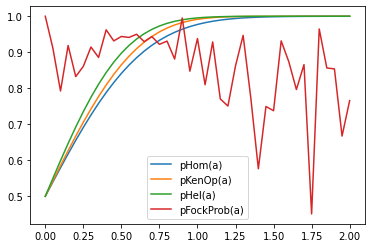

In [18]:
plt.plot(alphas, p_homos, label="pHom(a)")  # Plot the chart
plt.plot(alphas, p_ken_op, label="pKenOp(a)")
plt.plot(alphas, p_hels, label="pHel(a)")
plt.plot(alphas, csd_fock_prob_result['p_succ'], label="pFockProb(a)")
plt.legend()
plt.show() 

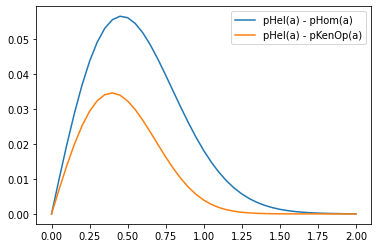

In [77]:
plt.plot(alphas, list(np.array(p_hels)-np.array(p_homos)), label="pHel(a) - pHom(a)")
plt.plot(alphas, list(np.array(p_hels)-np.array(p_ken_op)), label="pHel(a) - pKenOp(a)")
plt.legend()
plt.show()